In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, kurtosis


In [ ]:
df = pd.read_csv("house_price.csv")

df.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
df.info()
df.describe()
df.isnull().sum()

df['price_per_sqft'] = df['price'] / df['total_sqft']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [ ]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

upper = mean + 3 * std
lower = mean - 3 * std

df_mean_std = df[(df['price_per_sqft'] >= lower) & (df['price_per_sqft'] <= upper)]


In [5]:
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)

df_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]


In [6]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]


In [7]:
z_scores = zscore(df['price_per_sqft'])
abs_z_scores = np.abs(z_scores)

df_zscore = df[(abs_z_scores < 3)]


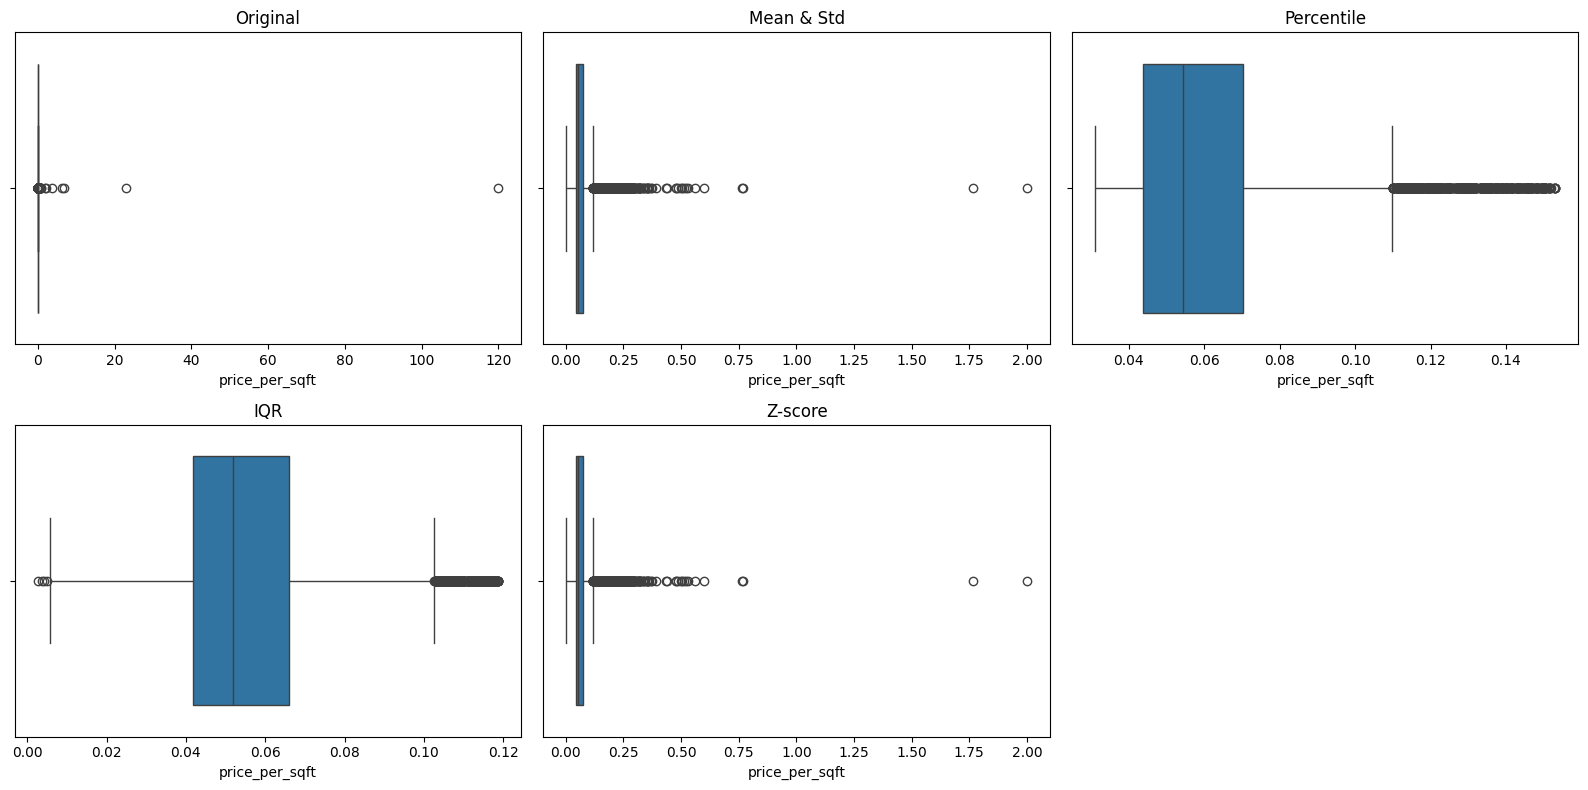

In [8]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
sns.boxplot(x=df['price_per_sqft'])
plt.title("Original")

plt.subplot(2, 3, 2)
sns.boxplot(x=df_mean_std['price_per_sqft'])
plt.title("Mean & Std")

plt.subplot(2, 3, 3)
sns.boxplot(x=df_percentile['price_per_sqft'])
plt.title("Percentile")

plt.subplot(2, 3, 4)
sns.boxplot(x=df_iqr['price_per_sqft'])
plt.title("IQR")

plt.subplot(2, 3, 5)
sns.boxplot(x=df_zscore['price_per_sqft'])
plt.title("Z-score")

plt.tight_layout()
plt.show()


Original Skewness: 108.26875399964706
Original Kurtosis: 12090.634145107539


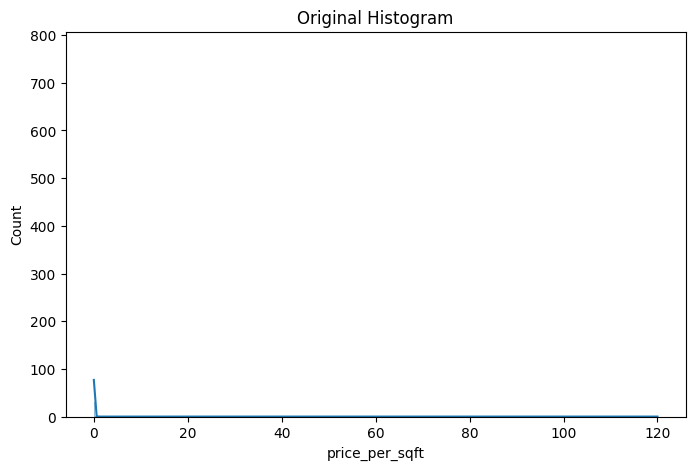

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Original Histogram")

print("Original Skewness:", skew(df['price_per_sqft']))
print("Original Kurtosis:", kurtosis(df['price_per_sqft']))


Log Skewness: 36.319282437465695
Log Kurtosis: 2093.8215807516235


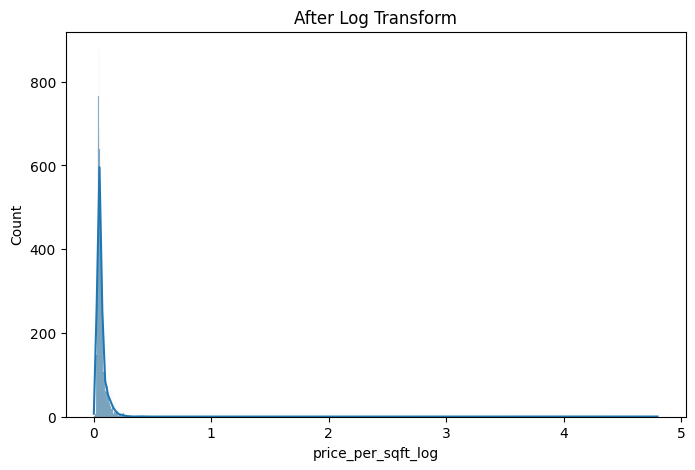

In [10]:
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

plt.figure(figsize=(8,5))
sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title("After Log Transform")

print("Log Skewness:", skew(df['price_per_sqft_log']))
print("Log Kurtosis:", kurtosis(df['price_per_sqft_log']))


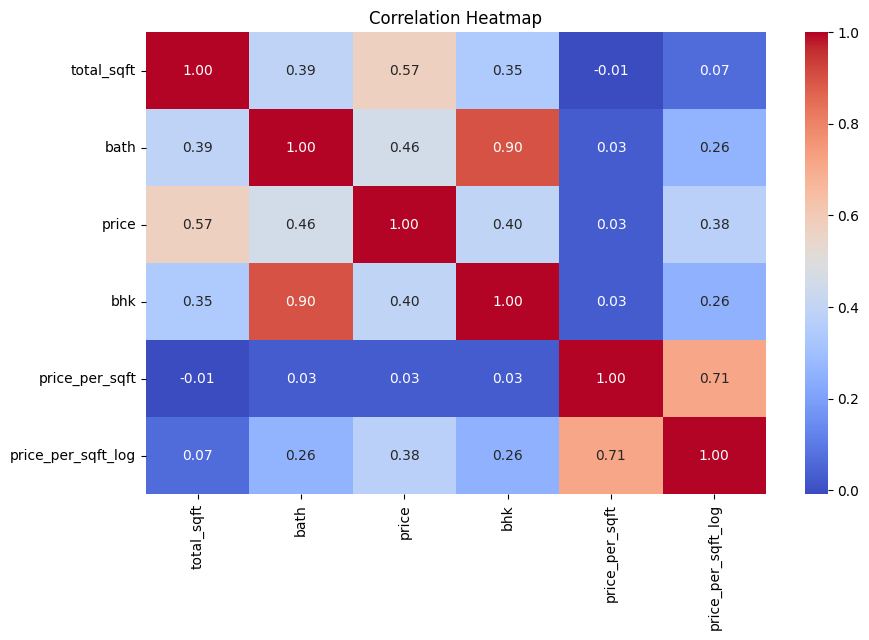

In [11]:
numeric_cols = df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


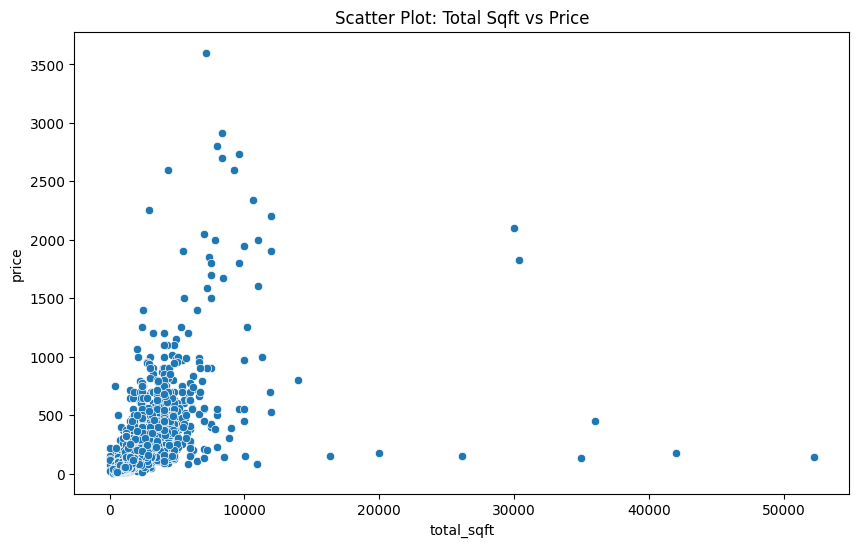

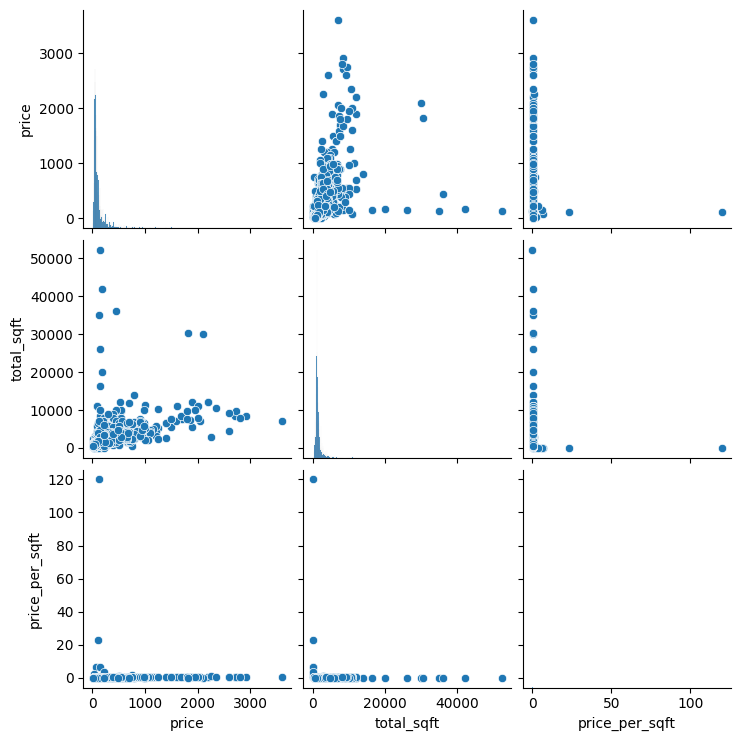

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='total_sqft', y='price')
plt.title("Scatter Plot: Total Sqft vs Price")
plt.show()

sns.pairplot(df[['price', 'total_sqft', 'price_per_sqft']])
